In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path='hin.txt'
with open(path, encoding="utf8", errors='ignore') as f:
         lines=f.readlines()

In [4]:
lines[0:5]

['Wow!\tवाह!\tCC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #6179147 (fastrizwaan)\n',
 'Help!\tबचाओ!\tCC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #459377 (minshirui)\n',
 'Jump.\tउछलो.\tCC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179121 (fastrizwaan)\n',
 'Jump.\tकूदो.\tCC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179122 (fastrizwaan)\n',
 'Jump.\tछलांग.\tCC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179123 (fastrizwaan)\n']

In [5]:
english=[];hindi=[]
for i in lines:
    hindi.append(i.split("\t")[1])
    english.append(i.split("\t")[0])

In [7]:
d={'english':english,'hindi':hindi}
df = pd.DataFrame(d, columns = ['english','hindi'], index=[i for i in range(len(english))])
df.head(5)

,english,hindi
0,Wow!,वाह!
1,Help!,बचाओ!
2,Jump.,उछलो.
3,Jump.,कूदो.
4,Jump.,छलांग.


In [8]:
path='Tatoeba-en.txt'
with open(path, encoding="utf8", errors='ignore') as f:
         lines_e=f.readlines()

In [9]:
path='Tatoeba-hi.txt'
with open(path, encoding="utf8", errors='ignore') as f:
         lines_h=f.readlines()

In [10]:
d={'english':lines_e,'hindi':lines_h}
df_2 = pd.DataFrame(d, columns = ['english','hindi'], index=[i for i in range(len(lines_e))])
df_2.head(5)

,english,hindi
0,I have to go to sleep. \n,मुझे सोना है। \n
1,Muiriel is 20 now. \n,म्यूरियल अब बीस साल की हो गई है। \n
2,Muiriel is 20 now. \n,म्यूरियल अब बीस साल की है। \n
3,"The password is ""Muiriel"". \n","कूटशब्द ""Muriel"" है। \n"
4,"The password is ""Muiriel"". \n","पासवर्ड ""Muriel"" है। \n"


In [11]:
#merge both data frames
train_df=pd.concat([df,df_2],ignore_index=True)
print(train_df.shape)
train_df.head()

(13815, 2)


,english,hindi
0,Wow!,वाह!
1,Help!,बचाओ!
2,Jump.,उछलो.
3,Jump.,कूदो.
4,Jump.,छलांग.


In [12]:
train_df.tail()

,english,hindi
13810,Let Grandma take care of the kid. \n,दादीजी को बच्चे का ख्याल रखने दो। \n
13811,French is a required subject. \n,फ़्रेंच एक अनिवार्य विषय है। \n
13812,They weren't from Boston. \n,वे बॉस्टन से नहीं थे। \n
13813,"Whenever she wears high heels, her legs hurt. \n","जब भी वो लम्बी हील्स पहनती है, उसकी टांगें हमे..."
13814,\n,\n


In [28]:
train_df.to_csv('new_eng_hindi.csv',index=False)

In [13]:
def decontractions(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

In [14]:
def clean_text(phrase):
    phrase = re.sub('[$)\?"’.°!;\'€%:|,।(/”/“]*', '', phrase)
    phrase = re.sub('[२३०८१५७९४६]*', '', phrase)
    phrase = re.sub('[0-9]', '', phrase)
    phrase = re.sub('[-]', ' ', phrase)
    return phrase

In [16]:
def preprocess_text_hindi(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = clean_text(sentance)
        preprocessed_text.append(sent.strip())
    return preprocessed_text

hindi_p=preprocess_text_hindi(train_df['hindi'])

100%|██████████| 13815/13815 [00:00<00:00, 31942.86it/s]


In [17]:
def preprocess_text_english(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = decontractions(str(sentance))
        sent = clean_text(sent)
        sent = ' '.join(e.lower() for e in sent.split())
        preprocessed_text.append(sent.strip())
    return preprocessed_text

english_p=preprocess_text_english(train_df['english'])

100%|██████████| 13815/13815 [00:00<00:00, 22800.61it/s]


In [18]:
train_df['processed_hindi']=hindi_p
train_df['processed_english']=english_p

In [20]:
train_df.head(10)

,english,hindi,processed_hindi,processed_english
0,Wow!,वाह!,वाह,wow
1,Help!,बचाओ!,बचाओ,help
2,Jump.,उछलो.,उछलो,jump
3,Jump.,कूदो.,कूदो,jump
4,Jump.,छलांग.,छलांग,jump
5,Hello!,नमस्ते।,नमस्ते,hello
6,Hello!,नमस्कार।,नमस्कार,hello
7,Cheers!,वाह-वाह!,वाह वाह,cheers
8,Cheers!,चियर्स!,चियर्स,cheers
9,Got it?,समझे कि नहीं?,समझे कि नहीं,got it


In [21]:
def find_length(sentence):
    return len(sentence.split())

In [22]:
train_df['len_processed_hindi'] = train_df['processed_hindi'].apply(find_length)
train_df['len_processed_english'] = train_df['processed_english'].apply(find_length)

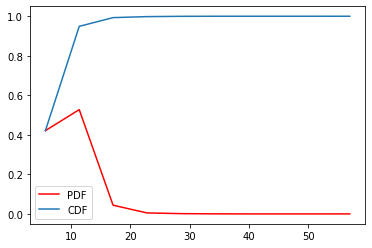

In [28]:
count, bins_count = np.histogram(train_df['len_processed_hindi'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

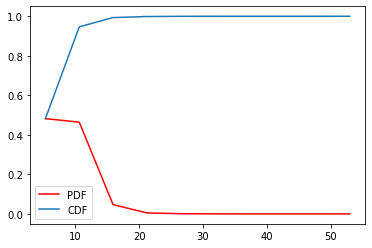

In [29]:
count, bins_count = np.histogram(train_df['len_processed_english'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

## Observation
### Most of the sentences are of length below 15 

In [25]:
df=train_df
df.drop(columns=['english','hindi'])

,processed_hindi,processed_english,len_processed_hindi,len_processed_english
0,वाह,wow,1,1
1,बचाओ,help,1,1
2,उछलो,jump,1,1
3,कूदो,jump,1,1
4,छलांग,jump,1,1
...,...,...,...,...
13810,दादीजी को बच्चे का ख्याल रखने दो,let grandma take care of the kid,7,7
13811,फ़्रेंच एक अनिवार्य विषय है,french is a required subject,5,5
13812,वे बॉस्टन से नहीं थे,they were not from boston,5,5
13813,जब भी वो लम्बी हील्स पहनती है उसकी टांगें हमेश...,whenever she wears high heels her legs hurt,13,8


In [30]:
df.to_csv('new_processed_hindi_english.csv',index=False)